<a href="https://colab.research.google.com/github/Tanisha2910/Data-Science-Python/blob/master/ClassificationAlgorithmComparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HOW TO COMPARE SKLEARN CLASSIFICATION ALGORITHM IN PYTHON**

In [0]:
# Load libraries
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [18]:
# Load libraries
dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.25)
# We use kfold to ensure that every observation from the original dataset have a chance of appearing in the training and test set.This is one of the best approach if we have limited data
kfold = model_selection.KFold(n_splits = 10, random_state = 40)
# Prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	     kfold = model_selection.KFold(n_splits=10, random_state=40)
	     cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	     results.append(cv_results)
	     names.append(name)
	     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	     print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LR: 0.953156 (0.034724)
LDA: 0.962292 (0.015980)
KNN: 0.948394 (0.029427)
CART: 0.910687 (0.027917)
NB: 0.934164 (0.036119)
SVM: 0.917996 (0.036573)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


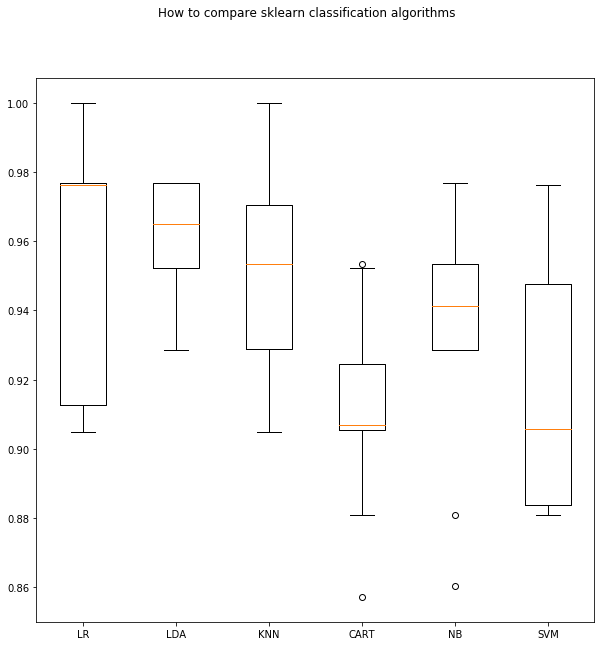

In [20]:
# boxplot algorithm comparison
fig = plt.figure(figsize = (10, 10))
fig.suptitle("How to compare sklearn classification algorithms")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()